<a href="https://colab.research.google.com/github/nipunidevinuwara/sequential_models/blob/main/IT21487484_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile

#upload the zip file
uploaded = files.upload()

Saving CatDog Dataset.zip to CatDog Dataset.zip


In [ ]:
zippath = '/content/CatDog Dataset.zip' #copy path of zipped file
expath = 'data/'
with zipfile.ZipFile(zippath,'r') as zipref:
  zipref.extractall(expath)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = '/content/data/Cat&Dog Dataset/Training_data'
valid_path = '/content/data/Cat&Dog Dataset/Testing_data'

In [ ]:
#Define the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512,activation='relu'),

    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size = (300,300), batch_size = 32, class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(valid_path, target_size = (300,300), batch_size = 32, class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam #or can use RMSprop

model.compile(loss='binary_crossentropy', #multiple classes use 'sparse_categorical_crossentropy'
              optimizer=Adam(learning_rate=0.001),#RMSprop
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_set,
    steps_per_epoch=10,
    epochs=10
)

Epoch 1/10
10/10 [==============================] - 27s 3s/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 2.0243 - val_accuracy: 0.6650
Epoch 2/10
10/10 [==============================] - 28s 3s/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 2.0171 - val_accuracy: 0.6550
Epoch 3/10
10/10 [==============================] - 30s 3s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 2.2241 - val_accuracy: 0.6450
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 2.2181 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 29s 3s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.1967 - val_accuracy: 0.6300
Epoch 6/10
10/10 [==============================] - 29s 3s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.3988 - val_accuracy: 0.6300
Epoch 7/10
10/10 [==============================] - 32s 3s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.2986 - val_accuracy: 0.6250
Epoch 8/10
10/10 [==

In [ ]:
model.save_weights('first_try.h5')

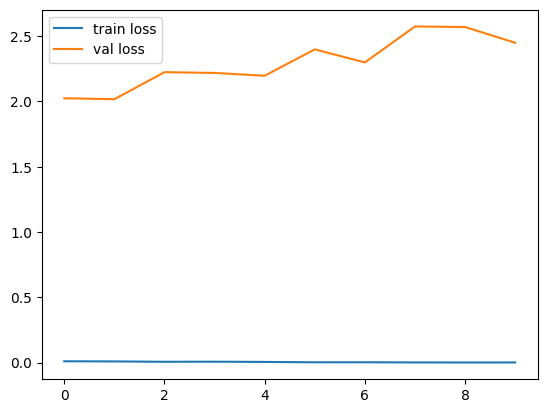

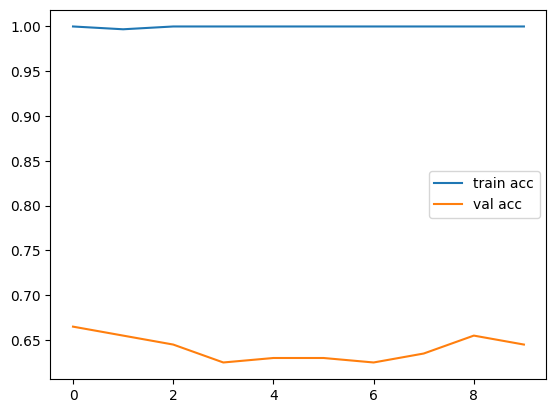

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')